In [13]:
import pandas as pd # olah dan analisis data
import matplotlib.pyplot as plt # visualisasi data
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model

iris_df = pd.read_csv('D:\Iris.csv') # memuat file csv sebagai data frame
iris_df.head() # tampilkan 5 baris pertama

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# iris_df = iris_df.drop(columns='Id')
iris_df.drop(columns='Id', inplace=True) # menghapus kolom bernama 'Id'
iris_df.head() # tampilkan 5 baris pertama

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris_df.drop_duplicates(inplace=True) # menghapus duplikasi data
iris_df.shape

(147, 5)

In [16]:
X = iris_df.drop(columns='Species') # menempatkan features ke dalam variable X
X.head() # tampilkan 5 baris pertama

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y = iris_df['Species'] # menempatkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [18]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(88, 4)
(88,)

testing dataset:
(59, 4)
(59,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train) # training model/classifier
    y_pred = model_knn.predict(X_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

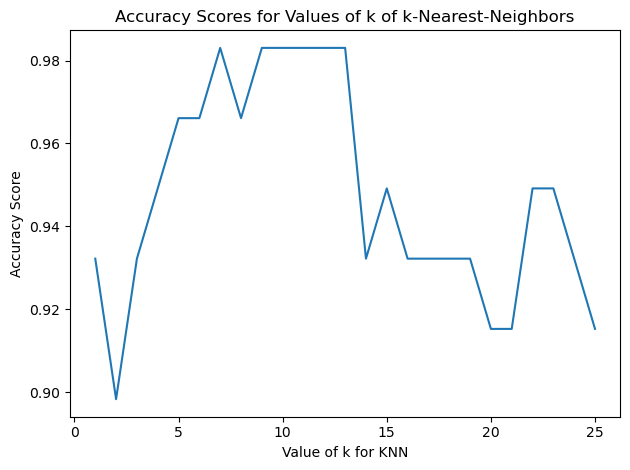

In [21]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [22]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

In [23]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.9322033898305084


In [24]:
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[18  0  0]
 [ 0 19  2]
 [ 0  2 18]]


In [25]:
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.90      0.90      0.90        21
 Iris-virginica       0.90      0.90      0.90        20

       accuracy                           0.93        59
      macro avg       0.93      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59

